In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

/var/folders/bb/xtrkcb7j07b7w0gcgcqgkm780000gn/T/ipykernel_39661/1973907838.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# block of code that will map the state names in the .txt to the appropriate abbreviations along
# the axes of our plots

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

us_abbrev_to_state = {v: k for k, v in us_state_to_abbrev.items()}

states_list = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [3]:
#read file in
data_frame = pd.read_csv("nT40.2_BWM.txt",delimiter="\t")
pd.set_option('display.max_rows', None)

We replace "Unreliable" by NaN.

In [4]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)

# data pre-processing to ensure new .txt runs with code provided by paper
# want columns to be the same name, and ensure the data is read as the correct type
# also want the correct subset of data to be processed  by later code, this figure is only for males
data_frame = data_frame.rename(columns = {"Single Race 6": "Race", "Residence State": "State"})
data_frame =  data_frame[(data_frame["Notes"] != "Total") & (data_frame["Year Code"] >= 2019) & 
                            (data_frame["Gender Code"] != "F")]

data_frame.drop('Year', axis = 1, inplace = True)
data_frame['Year Code'] = data_frame['Year Code'].astype(int)
data_frame = data_frame.rename(columns = {"Year Code": "Year"})

In [5]:
#preview/tester code to gauge missingness of data
# my_df = data_frame.dropna(subset = ['Crude Rate'], inplace = False)
# my_df

In [6]:
# defining relevant subsets of data that will be pivoted later
# named as 2x_20xx to indicate what race and what year the dataframe refers to
CM2b_2020 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2w_2020 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2b_2019 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]
CM2w_2019 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]

(0.0, 140.0)

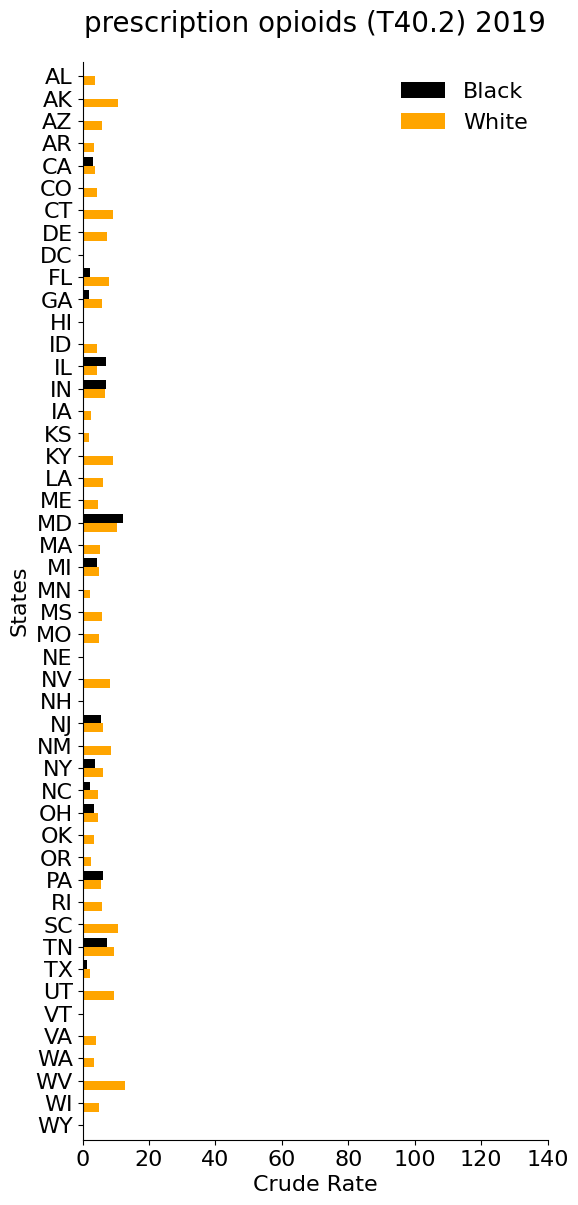

In [7]:
# pivoting columns, crude rate for the white group is labeled now as "white" and for the black group is labeled
# as "black"
left19 = pd.DataFrame({"States": CM2w_2019["State"].astype(str), "White": CM2w_2019["Crude Rate"].astype(float)})
right19 = pd.DataFrame({"States": CM2b_2019["State"].astype(str), "Black": CM2b_2019["Crude Rate"].astype(float)})
result219 = pd.merge(left19, right19, on= "States", how = 'outer')

df19 = pd.DataFrame(result219.loc[::-1])

# mapping full state names to abbreviations
state_codes_19 = pd.Series(df19["States"]).map(us_state_to_abbrev).to_numpy()
df19.index = state_codes_19

# plotting & formatting plot
ax = df19.plot(kind='barh', figsize=(6, 14),  color={"White": "orange", "Black": "black"}, width = 0.8, 
         fontsize=16)

plt.title('prescription opioids (T40.2) 2019', fontsize = 20, y=1.02)
plt.xlabel('Crude Rate', fontsize = 16)
plt.ylabel('States', fontsize = 16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0,140))

#this logic will be followed in the rest of the blocks plotting 2020 - 2023 crude rate

(0.0, 140.0)

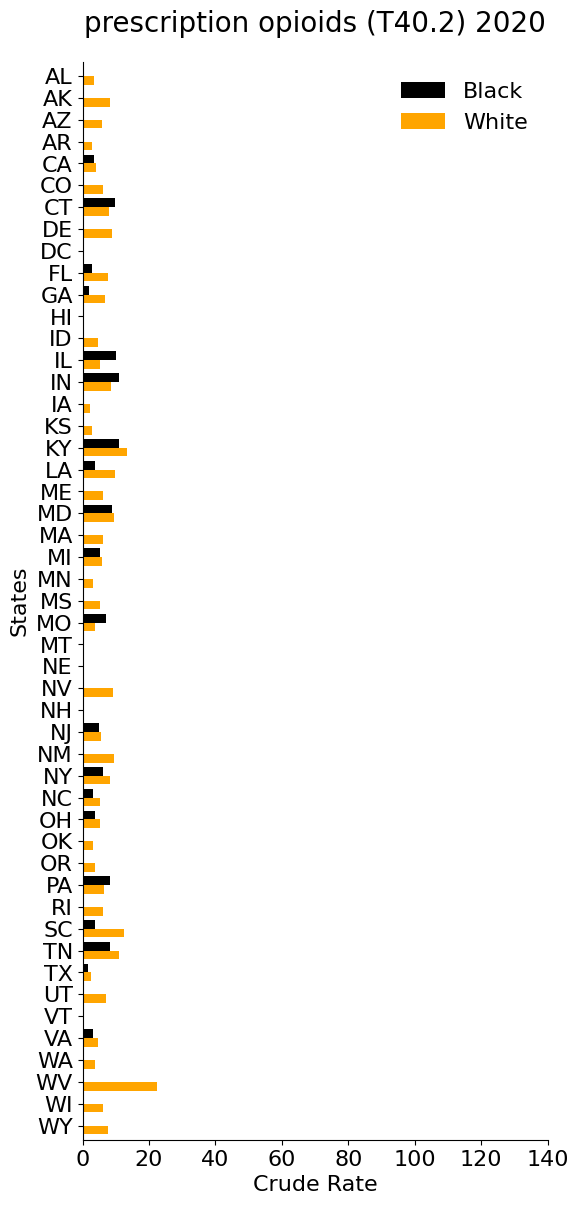

In [8]:
left20 = pd.DataFrame({"States": CM2w_2020["State"].astype(str), "White": CM2w_2020["Crude Rate"].astype(float)})
right20 = pd.DataFrame({"States": CM2b_2020["State"].astype(str), "Black": CM2b_2020["Crude Rate"].astype(float)})
result220 = pd.merge(left20, right20, on= "States", how = 'outer')

df20 = pd.DataFrame(result220.loc[::-1])

state_codes_20 = pd.Series(df20["States"]).map(us_state_to_abbrev).to_numpy()
df20.index = state_codes_20

ax2 = df20.plot(kind='barh', figsize=(6, 14),  color={"White": "orange", "Black": "black"}, width = 0.8, 
         fontsize=16)

plt.title('prescription opioids (T40.2) 2020', fontsize = 20, y=1.02)
plt.xlabel('Crude Rate', fontsize = 16)
plt.ylabel('States', fontsize = 16)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 16)
plt.xlim((0,140))

(0.0, 140.0)

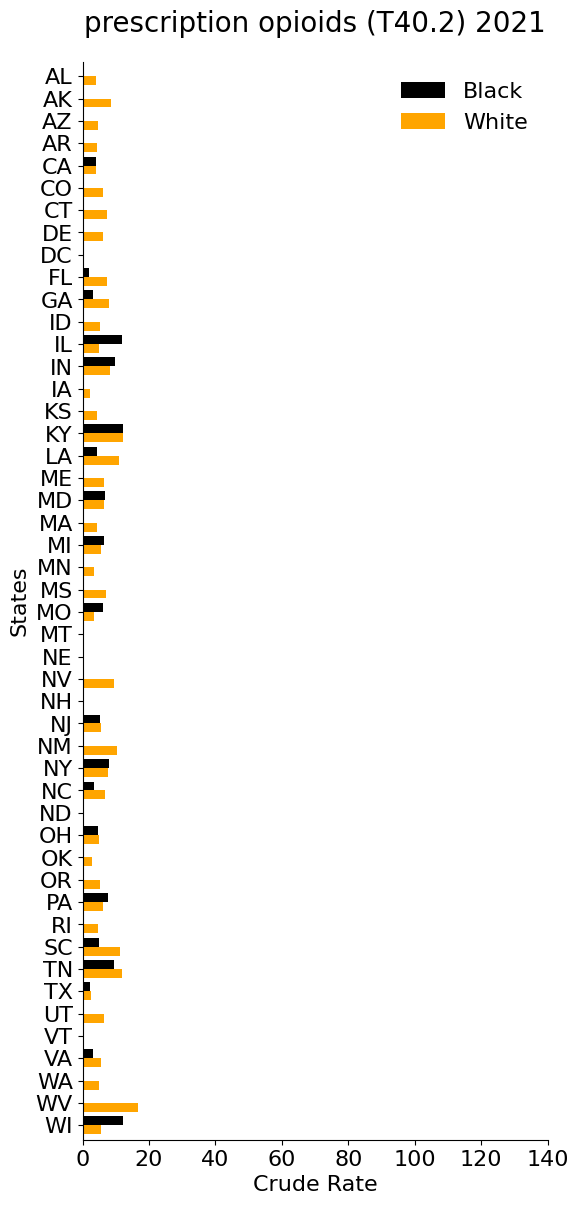

In [9]:
CM2b_2021 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2021)]
CM2w_2021 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2021)]

left21 = pd.DataFrame({"States": CM2w_2021["State"].astype(str), "White": CM2w_2021["Crude Rate"].astype(float)})
right21 = pd.DataFrame({"States": CM2b_2021["State"].astype(str), "Black": CM2b_2021["Crude Rate"].astype(float)})
result221 = pd.merge(left21, right21, on= "States", how = 'outer')

df21 = pd.DataFrame(result221.loc[::-1])

state_codes_21 = pd.Series(df21["States"]).map(us_state_to_abbrev).to_numpy()
df21.index = state_codes_21

ax2 = df21.plot(kind='barh', figsize=(6, 14),  color={"White": "orange", "Black": "black"}, width = 0.8, 
         fontsize=16)

plt.title('prescription opioids (T40.2) 2021', fontsize = 20, y=1.02)
plt.xlabel('Crude Rate', fontsize = 16)
plt.ylabel('States', fontsize = 16)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 16)
plt.xlim((0,140))

In [10]:
# plt.savefig('T40.2_2021_Race.png')

(0.0, 140.0)

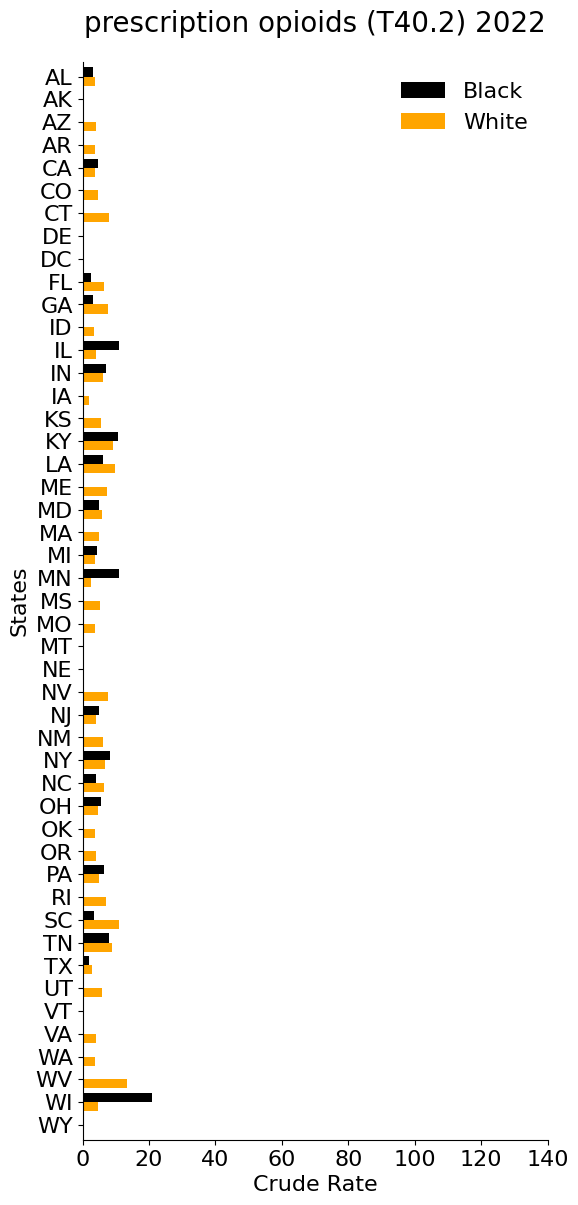

In [11]:
CM2b_2022 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2022)]
CM2w_2022 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2022)]

left22 = pd.DataFrame({"States": CM2w_2022["State"].astype(str), "White": CM2w_2022["Crude Rate"].astype(float)})
right22 = pd.DataFrame({"States": CM2b_2022["State"].astype(str), "Black": CM2b_2022["Crude Rate"].astype(float)})

result222 = pd.merge(left22, right22, on= "States", how = 'outer')

df22 = pd.DataFrame(result222.loc[::-1])
state_codes_22 = pd.Series(df22["States"]).map(us_state_to_abbrev).to_numpy()
df22.index = state_codes_22

ax2 = df22.plot(kind='barh', figsize=(6, 14),  color={"White": "orange", "Black": "black"}, width = 0.8, 
         fontsize=16)

plt.title('prescription opioids (T40.2) 2022', fontsize = 20, y=1.02)
plt.xlabel('Crude Rate', fontsize = 16)
plt.ylabel('States', fontsize = 16)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 16)
plt.xlim((0,140))

In [12]:
# plt.savefig('T40.2_2022_Race.png')

(0.0, 140.0)

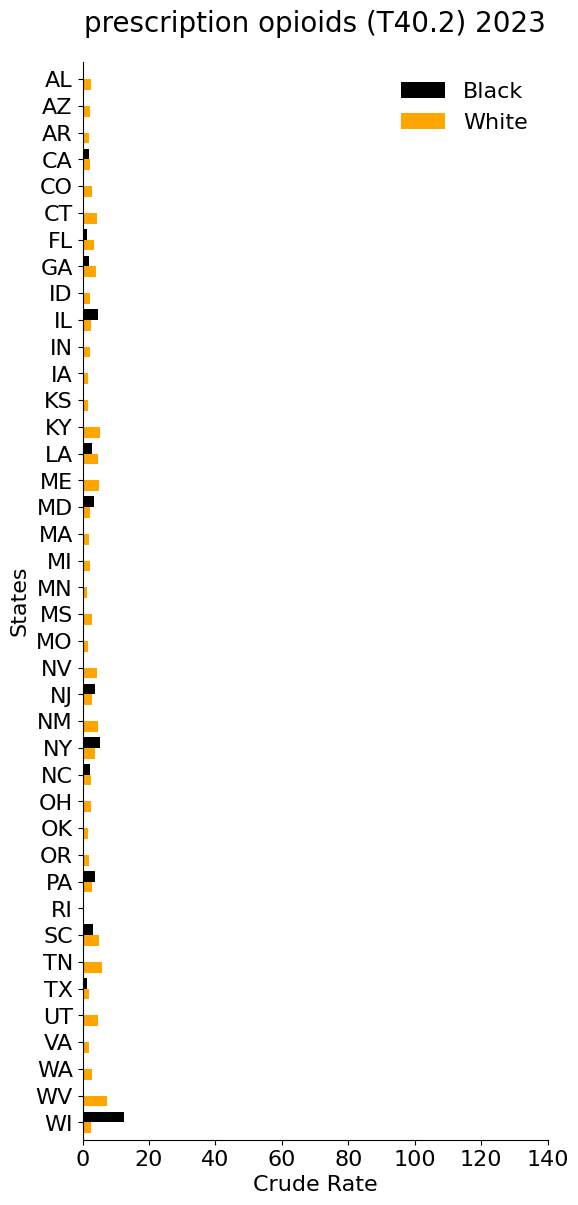

In [13]:
CM2b_2023 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2023)]
CM2w_2023 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2023)]

left23 = pd.DataFrame({"States": CM2w_2023["State"].astype(str), "White": CM2w_2023["Crude Rate"].astype(float)})
right23 = pd.DataFrame({"States": CM2b_2023["State"].astype(str), "Black": CM2b_2023["Crude Rate"].astype(float)})

result223 = pd.merge(left23, right23, on= "States", how = 'outer')

df23 = pd.DataFrame(result223.loc[::-1])
state_codes_23 = pd.Series(df23["States"]).map(us_state_to_abbrev).to_numpy()
df23.index = state_codes_23

ax2 = df23.plot(kind='barh', figsize=(6, 14),  color={"White": "orange", "Black": "black"}, width = 0.8, 
         fontsize=16)

plt.title('prescription opioids (T40.2) 2023', fontsize = 20, y=1.02)
plt.xlabel('Crude Rate', fontsize = 16)
plt.ylabel('States', fontsize = 16)
#plt.yticks(fontsize=14)
#plt.xticks(fontsize=14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 16)
plt.xlim((0,140))

In [30]:
# plt.savefig('T40.2_2023_Race.png')

<Figure size 640x480 with 0 Axes>